# FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.As a Data Scientist in this company, the Data Science team has shared some of the key questions that need to be answered. Some key questions have to be answered that will help the company to improve the business. These questions were designed to cut accross several key areas in a bid to cover all bases of importance.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head(8).T

,0,1,2,3,4,5,6,7
order_id,1477147,1477685,1477070,1477334,1478249,1477224,1477894,1477859
customer_id,337525,358141,66393,106968,76942,147468,157711,89574
restaurant_name,Hangawi,Blue Ribbon Sushi Izakaya,Cafe Habana,Blue Ribbon Fried Chicken,Dirty Bird to Go,Tamarind TriBeCa,The Meatball Shop,Barbounia
cuisine_type,Korean,Japanese,Mexican,American,American,Indian,Italian,Mediterranean
cost_of_the_order,30.75,12.08,12.23,29.2,11.59,25.22,6.07,5.97
day_of_the_week,Weekend,Weekend,Weekday,Weekend,Weekday,Weekday,Weekend,Weekday
rating,Not given,Not given,5,3,4,3,Not given,3
food_preparation_time,25,25,23,25,25,20,28,33
delivery_time,20,23,28,15,24,24,21,30


In [3]:
data = df.copy() # To save the original dataframe

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Check the shape of the dataset and write observations based on that.

In [5]:
df.shape

(1898, 9)


#### Observations:
- We can see that the dataset has 1898 Rows and 9 columns

### Question 2: Write the observations based on the below output from the info() method.

In [6]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- The data set contains several data types, order_id, customer_id, food_preparation_time, & delivery_time are Integers
- Restuarant_name, cuisine_type, day_of_the_week, & rating are Objects
- Only cost_of_order is of the float data type.

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' as this is the best practice.

In [6]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
df['restaurant_name'] = df.restaurant_name.astype('category')
df['cuisine_type'] = df.cuisine_type.astype('category')
df['day_of_the_week'] = df.day_of_the_week.astype('category')
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 103.7+ KB


#### Observations:
- There are 4 numeric columns, 3 categorical columns, 1 float column, & 1 object column

### **Question 4:** Find the summary statistics and write your observations based on that.

In [7]:
# write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
- The standard deviation for food_preparation_time & delivery_time are almost the same
- there is a somewhat wide range between the minimum & maximum amount paid as cost of food

### **Question 5:** How many orders are not rated?

In [12]:
df["rating"].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
- We can see that there are 736 orders that are not rated
- 5 star ratings are 588
- 4 star ratings are 386
- 3 star ratings are 188

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset.

In [13]:
# For the sake of Univariate analysis, let us Use the variable 'delivery_time'(numerical) to gain insight
data1 = df['delivery_time']

In [14]:
# Checking the lenght of the dataframe data1
len(data1)

1898

In [15]:
# Checking for null values
data1.isnull().sum()

0

Observation: 
- The variable 'delivery_time' has no null values so we can go ahead with our multivariate analysis

(array([ 87.,   0.,  90.,   0.,   0.,  78.,   0.,   0.,  83.,   0.,   0.,
         90.,   0.,  88.,   0.,   0.,  81.,   0.,   0.,  85.,   0.,   0.,
         77.,   0.,   0., 162.,   0., 120.,   0.,   0., 141.,   0.,   0.,
        138.,   0.,   0., 148.,   0., 148.,   0.,   0., 133.,   0.,   0.,
         41.,   0.,   0.,  59.,   0.,  49.]),
 array([15.  , 15.36, 15.72, 16.08, 16.44, 16.8 , 17.16, 17.52, 17.88,
        18.24, 18.6 , 18.96, 19.32, 19.68, 20.04, 20.4 , 20.76, 21.12,
        21.48, 21.84, 22.2 , 22.56, 22.92, 23.28, 23.64, 24.  , 24.36,
        24.72, 25.08, 25.44, 25.8 , 26.16, 26.52, 26.88, 27.24, 27.6 ,
        27.96, 28.32, 28.68, 29.04, 29.4 , 29.76, 30.12, 30.48, 30.84,
        31.2 , 31.56, 31.92, 32.28, 32.64, 33.  ]),
 <a list of 50 Patch objects>)

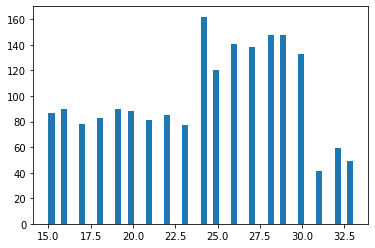

In [16]:
# The following code plots a histrogram using the matplotlib package.
# The bins argument creates class intervals. In this case we are creating 50 such intervals
plt.hist(data1, bins=50)

C:\Users\okwor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


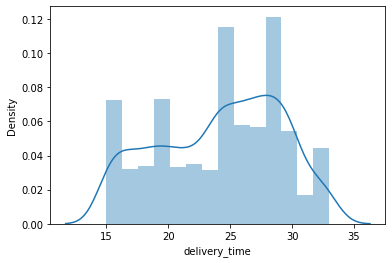

In [17]:
# In the above histogram, the first array is the frequency in each class and the second array contains the edges of the class intervals. These arrays can be assigned to a variable and used for further analysis.
sns.distplot(data1); # plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals.

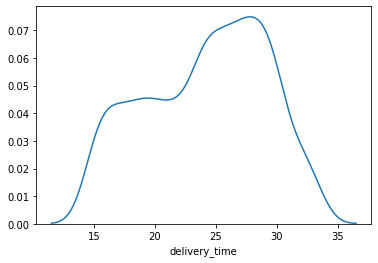

In [14]:
# Adding and arguement to plot just only the frequency polygon
sns.distplot(data1, hist=False);

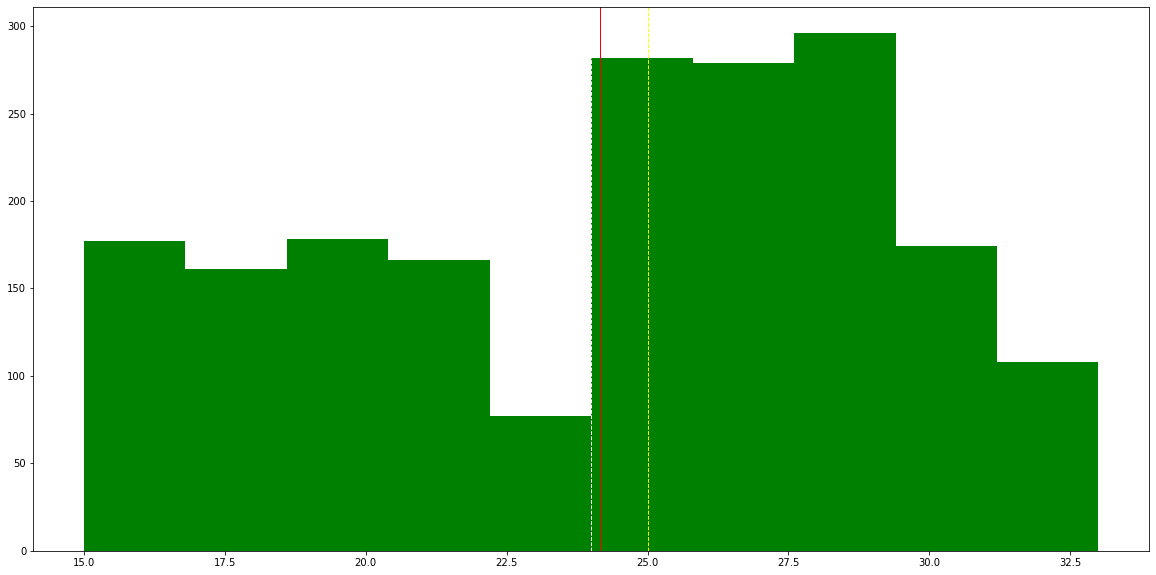

In [18]:
# we can now take a closer look at the distribution by plotting a simpler histogram with 10 bins
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(data1, color='g') # plots a simple histogram
plt.axvline(data1.mean(), color='r', linewidth=1)
plt.axvline(data1.median(), color='yellow', linestyle='dashed', linewidth=1)
plt.axvline(data1.mode()[0], color='w', linestyle='dashed', linewidth=1)

Observations:
- In the above histogram, the 8th bin with class limits (27.5,29) has the most number of observations. Meaning more deliveries were completed within this time.
- The bulk of the observations lie with the last 5 bins. 
- The median is on the 25 minute mark. 
- The distribution of delivery_time has multiple peaks(bimodal) with a sharp decline around the 21 minute mark.
- There are no outliers in this data.

In [19]:
# Let us also take a look at food_preparation_time(numerical) and perform univariate analysis on it
data2 = df['food_preparation_time']

In [20]:
# checking the lenght of the data
len(data2)

1898

In [21]:
# check for null values
data2.isnull().sum()

0

(array([119.,   0.,   0., 135.,   0.,   0., 123.,   0.,   0.,   0., 123.,
          0.,   0., 121.,   0.,   0., 113.,   0.,   0.,   0., 115.,   0.,
          0., 123.,   0.,   0., 121.,   0.,   0.,   0., 109.,   0.,   0.,
        119.,   0.,   0., 116.,   0.,   0.,   0., 113.,   0.,   0., 118.,
          0.,   0., 113.,   0.,   0., 117.]),
 array([20. , 20.3, 20.6, 20.9, 21.2, 21.5, 21.8, 22.1, 22.4, 22.7, 23. ,
        23.3, 23.6, 23.9, 24.2, 24.5, 24.8, 25.1, 25.4, 25.7, 26. , 26.3,
        26.6, 26.9, 27.2, 27.5, 27.8, 28.1, 28.4, 28.7, 29. , 29.3, 29.6,
        29.9, 30.2, 30.5, 30.8, 31.1, 31.4, 31.7, 32. , 32.3, 32.6, 32.9,
        33.2, 33.5, 33.8, 34.1, 34.4, 34.7, 35. ]),
 <a list of 50 Patch objects>)

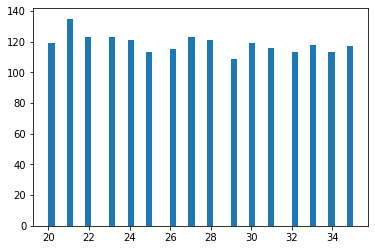

In [22]:
# there are no null values so we move on to the analysis by plotting a histogram
plt.hist(data2, bins=50)

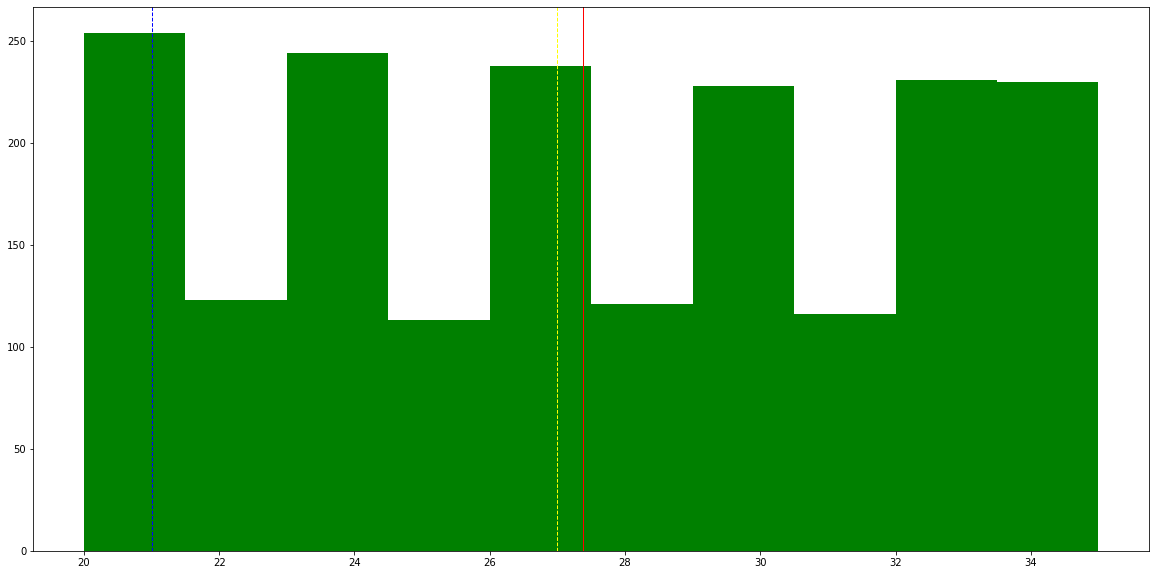

In [23]:
# we can now take a closer look at the distribution by plotting a simpler histogram with 10 bins.
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(data2, color='g') # plots a simple histogram
plt.axvline(data2.mean(), color='r', linewidth=1)
plt.axvline(data2.median(), color='yellow', linestyle='dashed', linewidth=1)
plt.axvline(data2.mode()[0], color='blue', linestyle='dashed', linewidth=1)

Observation:
- The distribution is somewhat evenly distributed with sharp decline at certain intervals.
- The fastest time for food preparation lies between the 20 minute and 21 minute mark.
- There are no outliers in this data.
- The mode is 21, median is 27, mean is about 27.5

In [24]:
# now we take day_of_the_week (categorical) as our last univariate variable for analysis
data3 = df['day_of_the_week']

In [25]:
# checking the lenght
len(data3)

1898

In [26]:
# checking for null values
data3.isnull().sum()

0

(array([1351.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         547.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

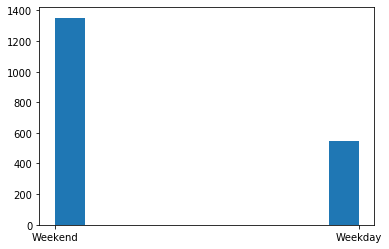

In [27]:
# there are no null values so we move on to plot our histogram
plt.hist(data3, bins=10)

Observation:
- Most of the food orders were made During the weekend.
- There are no outliers in the data.

### Question 7: Find the top 5 restaurants that have received the highest number of orders.

In [28]:
# write the code here
df["restaurant_name"].value_counts(ascending=False)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Gaia Italian Cafe              1
Taro Sushi                     1
'wichcraft                     1
Spice Thai                     1
Lamarca Pasta                  1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:
- Shake shack tops the list for most number of orders with 219, followed by The meatball shop which has 132, Blue ribbon sushi follows with 119 orders, Blue ribbon fried chicken with 96, Then Parm with 68 orders.
- 'witchcraft, Lamarca pasta, Kori restaurant & bar, Klong, & Kambi ramen house are at the bottom of the list with 1 order each.

### Question 8: Find the most popular cuisine on weekends.

In [30]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Spanish            11
Southern           11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
- The most popular cuisine ordered on weekends is American at 415, followed by the chinese at 163.
- Vietnamese cuisine is the least popular cuisine with just 4 orders.

### Question 9: Find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset? 

In [31]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order'] > 20]

# Calculate the number of total orders where the cost is above 20 dollars

print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
- Total number of orders above 20 dollars is 555
- The percentage of these orders is 29.24%

### Question 10: What is the mean delivery time based on this dataset?

In [32]:
# remember that deliver_time already exists as dataframe 'data1'
print(data1.mean())

24.161749209694417


#### Observations:
- The mean(average) delivery time is 24 minutes 16 seconds

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [34]:
df['cost_of_the_order'].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

In [35]:
df[df['cost_of_the_order'] == df['cost_of_the_order'].max()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


#### Observations:
* The customer_id of the customer who has spent the maximum amount on a single order is '62359'.

* The order details are:

>  The order_id is '1477814'. 

> The customer ordered at 'Pylos' which is a Mediterranean restaurant.

> The cost of the order was around 35 dollars.

> The order was placed on a weekend.

> The food preparation time and delivery time for the order were 21 minutes and 29 minutes respectively.

> The rating given by the customer is 4.

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset.

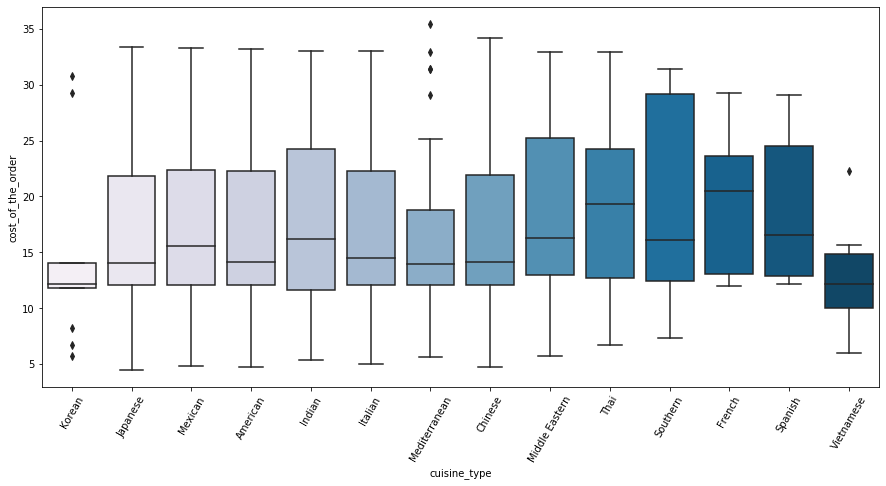

In [36]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

In [37]:
df[(df["cuisine_type"] == "Korean") & (df["cost_of_the_order"] <10)]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
301,1476856,59674,Woorijip,Korean,8.25,Weekend,3,26,26
464,1477600,347263,Hangawi,Korean,6.74,Weekend,Not given,21,22
1550,1477307,141732,Cho Dang Gol,Korean,5.77,Weekend,5,21,17


#### Observations:

* Vietnamese and Korean cuisines cost less compared to other cuisines.
* The boxplots for Italian, American, Chinese, Japanese cuisines are quite similar. This indicates that the quartile costs for these cuisines are quite similar.
* Outliers are present for the cost of Korean, Mediterranean and Vietnamese cuisines.
* French and Spanish cuisines are costlier compared to other cuisines.

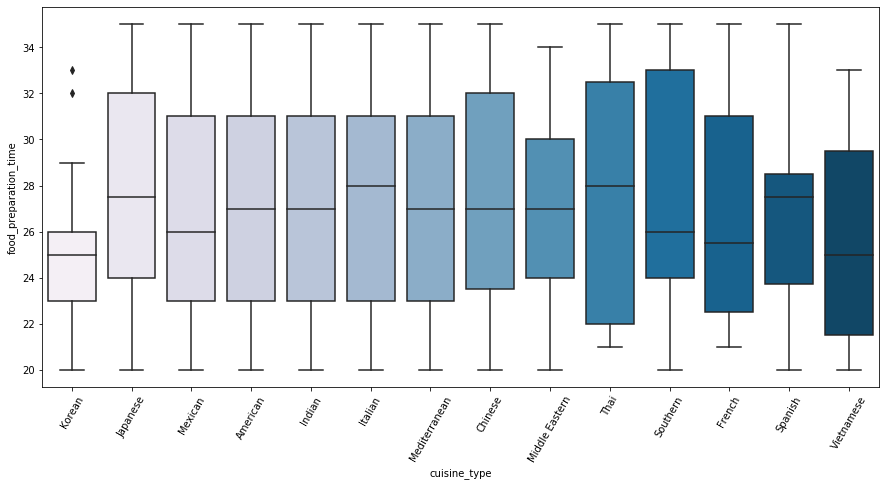

In [38]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations:

* Food preparation time is very consistent for most of the cuisines. 
* The median food preparation time lies between 24 and 30 minutes for all the cuisines.
* Outliers are present for the food preparation time of Korean cuisine.
* Korean cuisine takes less time compared to the other cuisines.


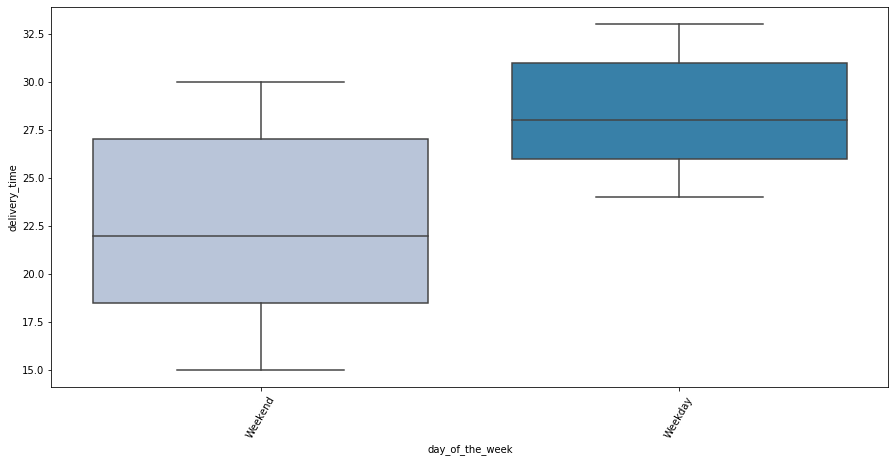

In [39]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

Observation:
- As we can observe, there is a steady rise in number of deliveries starting on weekdays and finally peaking at the weekend which tells us that frequency of deliveries/orders is high during the weekends.

In [40]:
plt.figure(figsize = (15, 7))
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).tail(3)

restaurant_name
Big Wong Restaurant _¤¾Ñ¼    5.92
Cipriani Le Specialita        5.92
Hunan Manor                   5.72
Name: cost_of_the_order, dtype: float64

<Figure size 1080x504 with 0 Axes>

#### Observations:

* The above 14 restaurants are generating more than 500 dollars revenue.


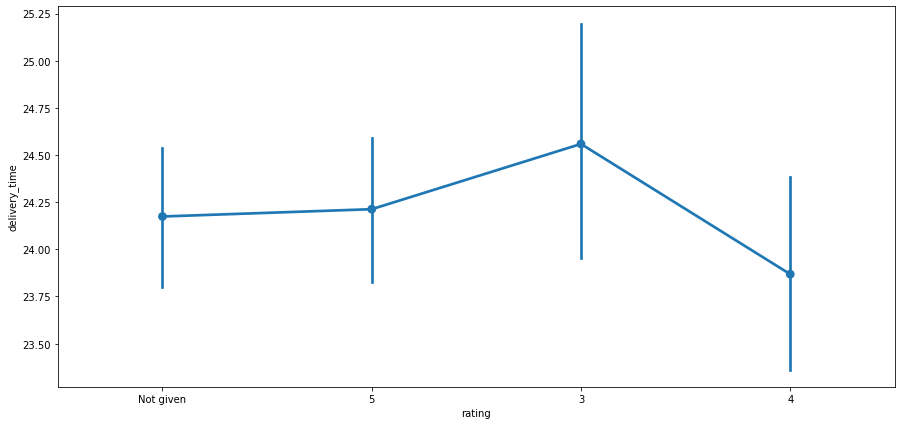

In [42]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Observations:

* It is possible that delivery time plays a role in the low-rating of the orders.


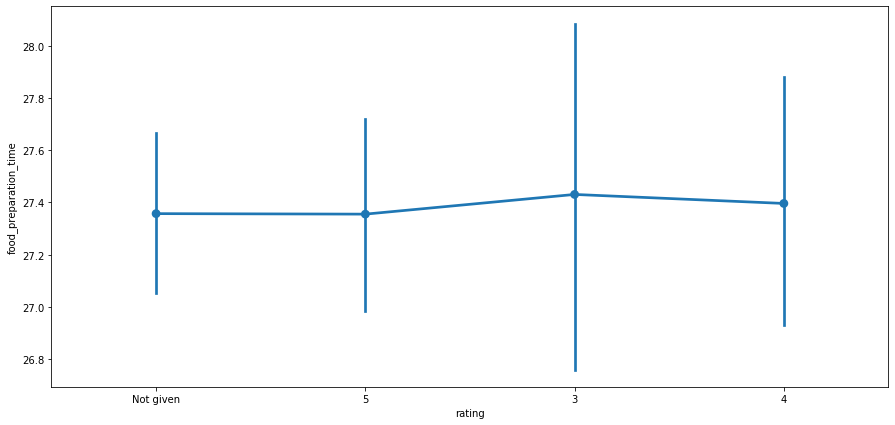

In [43]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

#### Observations:

* It seems that food preparation time does not play a role in the low-rating of the orders.


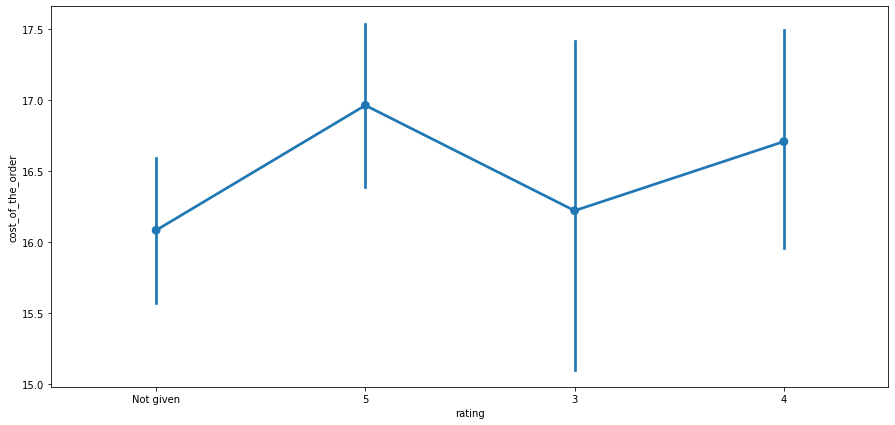

In [44]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

#### Observations

* It seems that high-cost orders have been rated well and low-cost orders have not been rated.

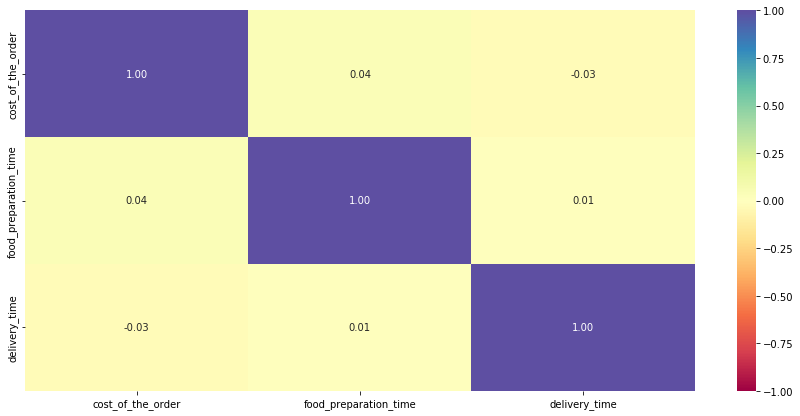

In [45]:

# plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()



#### Observations:

* There is no correlation between cost of the order, delivery time and food preparation time.


### Question 13: The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [46]:
df_rated = df[df['rating'] != "Not given"]

df_rated.rating.value_counts()

5    588
4    386
3    188
Name: rating, dtype: int64

In [47]:
# filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()
# convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')
# create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head(20)

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
5,Parm,39
6,RedFarm Hudson,34
7,TAO,28
8,Rubirosa,24
9,Nobu Next Door,23


In [49]:
# convert rating column from object to interger
df_rated['rating'] = df_rated['rating'].astype('int')

# create a dataframe that contains restaurant name with their ratings
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
df_rating_count.head(10)

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
5,Parm,39
6,RedFarm Hudson,34
7,TAO,28
8,Rubirosa,24
9,Nobu Next Door,23


In [51]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name'] 

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(["restaurant_name"])["rating"].mean().sort_values(ascending = False).reset_index().dropna() 


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

* The restaurants fulfilling the criteria to get the promotional offer are: **'The Meatball Shop', 'Blue Ribbon Fried Chicken',  'Shake Shack' and 'Blue Ribbon Sushi'**.


### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated on all the orders given in the dataset.

In [52]:
def custom_filter(df):
    if df['cost_of_the_order'] > 20:
        val = df['cost_of_the_order'] * 0.25
    elif df['cost_of_the_order'] > 5:
        val = df['cost_of_the_order'] * 0.15
    else:
        val = 0
    return val

In [53]:
df['foodhub_charge'] = df.apply(custom_filter, axis=1)
print('The net revenue is around', round(df['foodhub_charge'].sum(), 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:

* The net revenue generated on all the orders given in the dataset is around 6166.3 dollars.


### Question 15: Suppose the company wants to analyze the total time required to deliver the food. What is the percentage of orders that have more than 60 minutes of total delivery time?

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [54]:
# add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# find the percentage of orders that have more than 60 minutes of total delivery time
print ('The percentage of orders that have more than 60 minutes of total delivery time is',
       round(df[df['total_time'] > 60].shape[0] / df.shape[0] * 100, 2),'%')

The percentage of orders that have more than 60 minutes of total delivery time is 10.54 %


#### Observations:

* Approximately 10.54 % of the total orders have more than 60 minutes of total delivery time.


### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [55]:
# get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

# get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes



#### Observations:

* The mean delivery time on weekdays is around 28 minutes whereas the mean delivery time on weekends is around 22 minutes.

* This could be due to the dip of traffic volume in the weekends.

## Conclusions and business recommendations derived from the analysis.

## Key Insights:

### Conclusions:

* Around 80% of the orders are for American, Japanese, Italian and Chinese cuisines. Thus, it seems that these cuisines are quite popular among customers of FoodHub. 
* Shake Shack is the most popular restaurant that has received the highest number of orders.
* Order volumes increase on the weekends compared to the weekdays.
* Delivery time over the weekends is less compared to the weekdays. This could be due to the dip in traffic volume over the weekends.
* Around 39% of the orders have not been rated.

### Business Recommendations:

* FoodHub should integrate with restaurants serving American, Japanese, Italian and Chinese cuisines as these cuisines are very popular among FoodHub customers. 

* FoodHub should provide promotional offers to top-rated popular restaurants like Shake Shack that serve most of the orders. 

* As the order volume is high during the weekends, more delivery persons should be employed during the weekends to ensure timely delivery of the order. Weekend promotional offers should be given to the customers to increase the food orders during weekends.

* Customer Rating is a very important factor to gauge customer satisfaction. The company should investigate the reason behind the low count of ratings. They can redesign the rating page in the app and make it more interactive to lure the customers to rate the order. 

* Around 11% of the total orders have more than 60 minutes of total delivery time. FoodHub should try to minimize such instances in order to avoid customer dissatisfaction. They can provide some reward to the punctual delivery persons.